In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 8.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Species'>

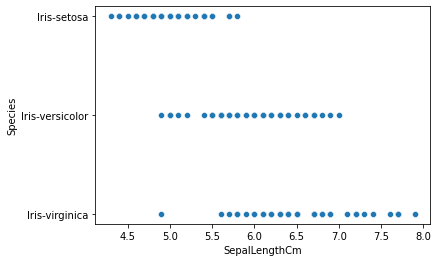

In [8]:
sns.scatterplot(x='SepalLengthCm',y='Species',data=df)

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Species'>

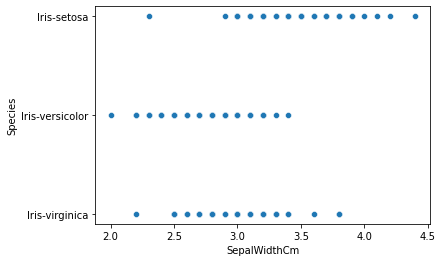

In [9]:
# We can see 1 outlier in iris-setosa
sns.scatterplot(x='SepalWidthCm',y='Species',data=df)

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Species'>

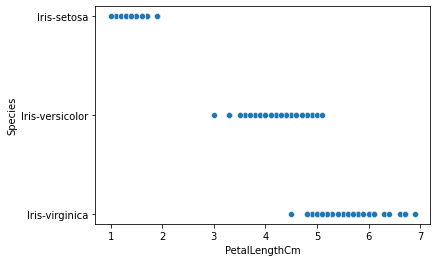

In [10]:
sns.scatterplot(x='PetalLengthCm',y='Species',data=df)

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Species'>

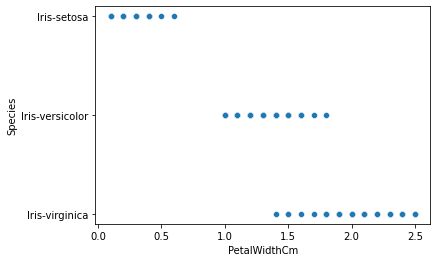

In [11]:
sns.scatterplot(x='PetalWidthCm',y='Species',data=df)

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()

In [14]:
df['Species'] = le.fit_transform(df['Species'])

In [15]:
df.drop('Id',inplace=True,axis=1)

In [16]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [17]:
from scipy import stats
df = df[(np.abs(stats.zscore(df.loc[:,:])) < 3).all(axis=1)]

In [18]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier , XGBRFClassifier
from catboost import CatBoostClassifier

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report as cr , confusion_matrix as cm

In [21]:
# Feature splitting 
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)

In [23]:
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators=300)
xgbc = XGBClassifier()
xgbrfc = XGBRFClassifier()
catboost = CatBoostClassifier()

In [24]:
def model(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("Confusion matrix is :\n",cm(y_test,y_pred))
    print("Classification report is :\n",cr(y_test,y_pred))

In [25]:
# Theres a very high possibility this model is overfitting and wont predict correctly 
model(dtc)

Confusion matrix is :
 [[23  0  0]
 [ 0 29  2]
 [ 0  1 20]]
Classification report is :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.97      0.94      0.95        31
           2       0.91      0.95      0.93        21

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



In [26]:
# Random forests are almost impossible to overfit 
model(rfc)

Confusion matrix is :
 [[23  0  0]
 [ 0 29  2]
 [ 0  1 20]]
Classification report is :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.97      0.94      0.95        31
           2       0.91      0.95      0.93        21

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



In [27]:
# My preferred choice would be xgbc and xgbrfc
model(xgbc)

[01:18:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion matrix is :
 [[23  0  0]
 [ 0 28  3]
 [ 0  1 20]]
Classification report is :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.97      0.90      0.93        31
           2       0.87      0.95      0.91        21

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75



C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [28]:
model(xgbrfc)

[01:18:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion matrix is :
 [[23  0  0]
 [ 0 29  2]
 [ 0  2 19]]
Classification report is :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.94      0.94      0.94        31
           2       0.90      0.90      0.90        21

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75



C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [29]:
# Catboost is very reliable here with very high precision and no overfitting
model(catboost)

Learning rate set to 0.069287
0:	learn: 1.0237337	total: 134ms	remaining: 2m 13s
1:	learn: 0.9668416	total: 135ms	remaining: 1m 7s
2:	learn: 0.9186316	total: 135ms	remaining: 44.9s
3:	learn: 0.8687287	total: 135ms	remaining: 33.7s
4:	learn: 0.8291032	total: 136ms	remaining: 27.1s
5:	learn: 0.7966251	total: 137ms	remaining: 22.6s
6:	learn: 0.7687038	total: 137ms	remaining: 19.4s
7:	learn: 0.7302772	total: 137ms	remaining: 17s
8:	learn: 0.6925067	total: 138ms	remaining: 15.2s
9:	learn: 0.6579786	total: 138ms	remaining: 13.7s
10:	learn: 0.6315566	total: 139ms	remaining: 12.5s
11:	learn: 0.6048585	total: 139ms	remaining: 11.5s
12:	learn: 0.5770934	total: 140ms	remaining: 10.6s
13:	learn: 0.5550238	total: 140ms	remaining: 9.89s
14:	learn: 0.5221110	total: 141ms	remaining: 9.23s
15:	learn: 0.4996352	total: 141ms	remaining: 8.68s
16:	learn: 0.4777224	total: 142ms	remaining: 8.19s
17:	learn: 0.4589682	total: 142ms	remaining: 7.75s
18:	learn: 0.4417999	total: 143ms	remaining: 7.36s
19:	learn: 0

266:	learn: 0.0242567	total: 280ms	remaining: 769ms
267:	learn: 0.0241801	total: 281ms	remaining: 766ms
268:	learn: 0.0240891	total: 281ms	remaining: 764ms
269:	learn: 0.0239662	total: 282ms	remaining: 762ms
270:	learn: 0.0238686	total: 282ms	remaining: 759ms
271:	learn: 0.0237613	total: 283ms	remaining: 757ms
272:	learn: 0.0236753	total: 283ms	remaining: 755ms
273:	learn: 0.0235494	total: 284ms	remaining: 752ms
274:	learn: 0.0234444	total: 285ms	remaining: 750ms
275:	learn: 0.0233264	total: 285ms	remaining: 748ms
276:	learn: 0.0232385	total: 286ms	remaining: 746ms
277:	learn: 0.0231562	total: 286ms	remaining: 743ms
278:	learn: 0.0230730	total: 287ms	remaining: 741ms
279:	learn: 0.0229847	total: 287ms	remaining: 739ms
280:	learn: 0.0228694	total: 288ms	remaining: 737ms
281:	learn: 0.0228122	total: 288ms	remaining: 734ms
282:	learn: 0.0227119	total: 289ms	remaining: 732ms
283:	learn: 0.0226397	total: 290ms	remaining: 730ms
284:	learn: 0.0225384	total: 290ms	remaining: 728ms
285:	learn: 

530:	learn: 0.0112825	total: 432ms	remaining: 381ms
531:	learn: 0.0112617	total: 432ms	remaining: 380ms
532:	learn: 0.0112407	total: 433ms	remaining: 379ms
533:	learn: 0.0112156	total: 433ms	remaining: 378ms
534:	learn: 0.0111872	total: 434ms	remaining: 377ms
535:	learn: 0.0111696	total: 434ms	remaining: 376ms
536:	learn: 0.0111510	total: 435ms	remaining: 375ms
537:	learn: 0.0111306	total: 436ms	remaining: 374ms
538:	learn: 0.0111012	total: 436ms	remaining: 373ms
539:	learn: 0.0110722	total: 437ms	remaining: 372ms
540:	learn: 0.0110492	total: 438ms	remaining: 372ms
541:	learn: 0.0110273	total: 439ms	remaining: 371ms
542:	learn: 0.0110101	total: 439ms	remaining: 370ms
543:	learn: 0.0109902	total: 440ms	remaining: 369ms
544:	learn: 0.0109685	total: 440ms	remaining: 368ms
545:	learn: 0.0109506	total: 441ms	remaining: 367ms
546:	learn: 0.0109182	total: 441ms	remaining: 366ms
547:	learn: 0.0109018	total: 442ms	remaining: 365ms
548:	learn: 0.0108826	total: 442ms	remaining: 363ms
549:	learn: 

802:	learn: 0.0071505	total: 586ms	remaining: 144ms
803:	learn: 0.0071400	total: 587ms	remaining: 143ms
804:	learn: 0.0071249	total: 588ms	remaining: 142ms
805:	learn: 0.0071148	total: 588ms	remaining: 142ms
806:	learn: 0.0071088	total: 589ms	remaining: 141ms
807:	learn: 0.0071023	total: 590ms	remaining: 140ms
808:	learn: 0.0070940	total: 590ms	remaining: 139ms
809:	learn: 0.0070855	total: 591ms	remaining: 139ms
810:	learn: 0.0070774	total: 591ms	remaining: 138ms
811:	learn: 0.0070699	total: 592ms	remaining: 137ms
812:	learn: 0.0070604	total: 592ms	remaining: 136ms
813:	learn: 0.0070504	total: 593ms	remaining: 135ms
814:	learn: 0.0070403	total: 593ms	remaining: 135ms
815:	learn: 0.0070290	total: 594ms	remaining: 134ms
816:	learn: 0.0070155	total: 595ms	remaining: 133ms
817:	learn: 0.0070075	total: 595ms	remaining: 132ms
818:	learn: 0.0070014	total: 596ms	remaining: 132ms
819:	learn: 0.0069942	total: 596ms	remaining: 131ms
820:	learn: 0.0069861	total: 597ms	remaining: 130ms
821:	learn: 